In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from PIL import Image
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

2024-04-24 19:46:12.778918: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 19:46:13.255817: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 19:46:14.604589: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 19:46:18.680823: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


ONE HOT ENCODING THE TARGET

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])
#0 = tumor
#1=normal

OneHotEncoder()

In [3]:
OneHotEncoder()

OneHotEncoder()

creatinng 3 important lists

In [18]:
data =[]
paths=[]
result=[]

for r,d,f in os.walk('/home/davinci/Desktop/dt/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img =  img.resize((150,150))
    img = np.array(img)
    if (img.shape==(150,150,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())


In [19]:
data =[]
paths=[]
result=[]

for r,d,f in os.walk('/home/davinci/Desktop/dt/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img =  img.resize((150,150))
    img = np.array(img)
    if (img.shape==(150,150,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [20]:
data = np.array(data)
data.shape

(77, 150, 150, 3)

In [22]:
result = np.array(result)
result = result.reshape(77,2)

splitting the data into tarining nad testing

In [23]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

MODEL BUILDING
BatchNormalization stabiliezes trhe lerning process and dramatically reduces the number of training eposchs required to train a deep network

In [24]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(150,150,3),padding="Same"))
model.add(Conv2D(32,kernel_size=(2,2),activation="relu",padding="Same"))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam')
print(model.summary())

/home/davinci/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 150, 150, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 150, 150, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 180000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    92,160,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,166,210 (351.59 MB)

 Trainable params: 92,166,146 (351.59 MB)

 Non-trainable params: 64 (256.00 B)

None


In [25]:
x_train.shape
x_test.shape

(16, 150, 150, 3)

In [26]:
y_train.shape
y_test.shape

(16, 2)

In [32]:
history = model.fit(x_train,y_train,epochs=30,batch_size=40,verbose=1,validation_data=(x_test,y_test))

Epoch 1/30


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 12/30
2/2 ━━━━━━━━━

plotting losses

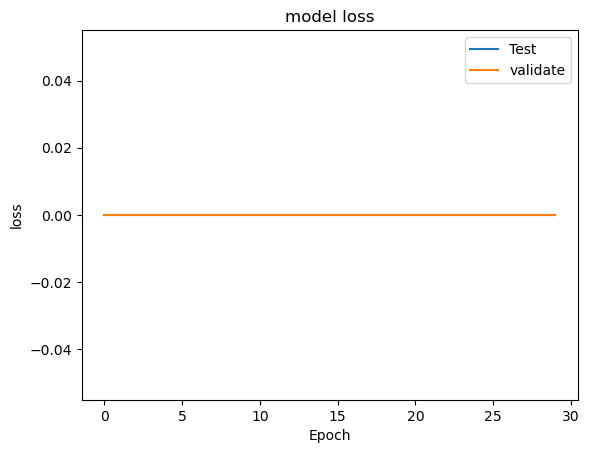

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Test','validate'],loc='upper right')